# Car Price Assignment

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# Loading csv file
car_price = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# Dropping car_ID column as it is insignificant to analysis
car_price = car_price.drop(['car_ID'],axis=1)

In [4]:
# Extracting carcompany and dropping carName
car_price['CarName'] = car_price['CarName'].str.replace('-',' ')
car_price[['carcompany','nameCar']] = car_price['CarName'].str.split(' ',1,expand=True)
car_price = car_price.drop(['CarName','nameCar'],axis=1)
car_price.head(300)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi


## Data Visualisation

In [5]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

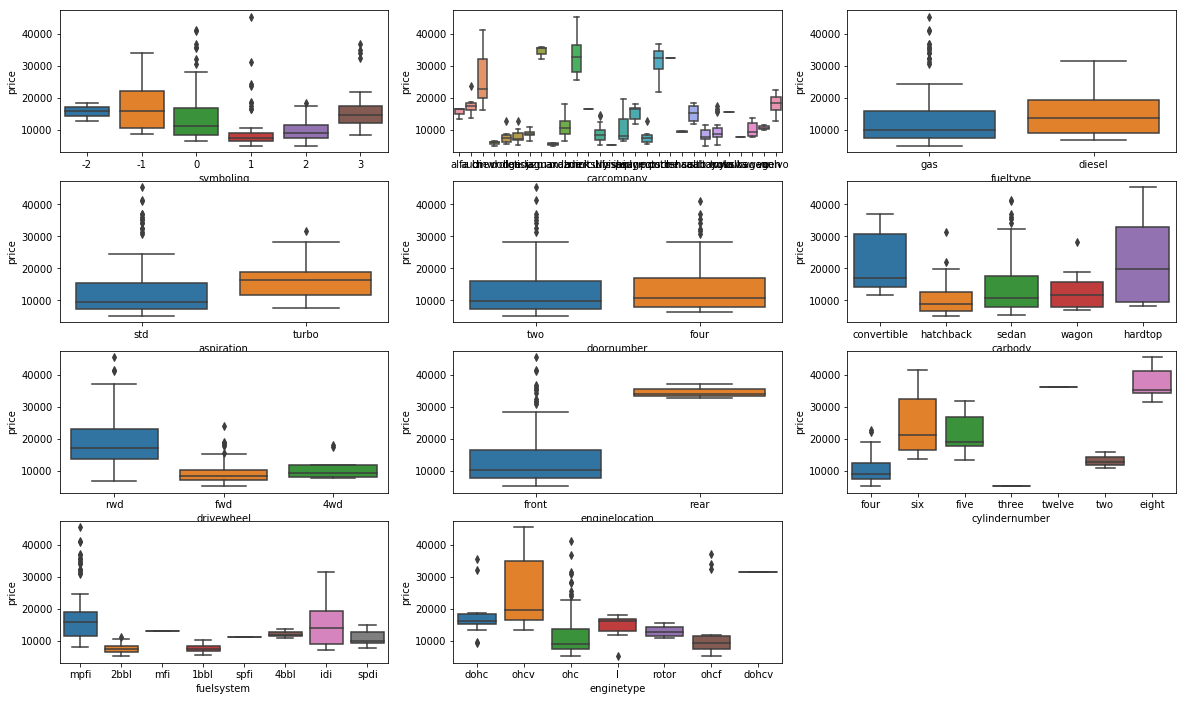

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_price)
plt.subplot(4,3,2)
sns.boxplot(x = 'carcompany', y = 'price', data = car_price)
plt.subplot(4,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(4,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(4,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(4,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.subplot(4,3,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)
plt.subplot(4,3,11)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.show()

## Data Cleaning/ Preperation

In [7]:
# Mapping variables having duel values mapped to 0 or 1

def binary_map_fueltype(x):
    return x.map({'diesel': 1, "gas": 0})

def binary_map_aspiration(x):
    return x.map({'std': 1, "turbo": 0})

def binary_map_doornumber(x):
    return x.map({'two': 1, "four": 0})

def binary_map_enginelocation(x):
    return x.map({'front': 1, "rear": 0})

car_price[['fueltype']] = car_price[['fueltype']].apply(binary_map_fueltype)
car_price[['aspiration']] = car_price[['aspiration']].apply(binary_map_aspiration)
car_price[['doornumber']] = car_price[['doornumber']].apply(binary_map_doornumber)
car_price[['enginelocation']] = car_price[['enginelocation']].apply(binary_map_enginelocation)

car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,3,0,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,3,0,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,1,0,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,2,0,1,0,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,0,1,0,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
# Creating dummy variables for symboling,carcompany,carbody,drivewheel,enginetype,cylindernumber,fuelsystem

sym = pd.get_dummies(car_price['symboling'],drop_first = True)
car_price = pd.concat([car_price, sym], axis = 1)
car_price = car_price.drop(['symboling'],axis=1)
sym.head()

,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


Binary Representation for the above is as follows.
00000 - -2
10000 - -1
01000 -  0
00100 -  1
00010 -  2
00001 -  3

The above steps are repeated for columns : carcompany,carbody,drivewheel,enginetype,cylindernumber,fuelsystem

In [9]:
#carcompany
sym = pd.get_dummies(car_price['carcompany'],drop_first = True)
car_price = pd.concat([car_price, sym], axis = 1)
car_price = car_price.drop(['carcompany'],axis=1)
sym.head()

,alfa,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
#carbody
sym = pd.get_dummies(car_price['carbody'],drop_first = True)
car_price = pd.concat([car_price, sym], axis = 1)
car_price = car_price.drop(['carbody'],axis=1)
sym.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [11]:
#drivewheel
sym = pd.get_dummies(car_price['drivewheel'],drop_first = True)
car_price = pd.concat([car_price, sym], axis = 1)
car_price = car_price.drop(['drivewheel'],axis=1)
sym.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [12]:
#enginetype
sym = pd.get_dummies(car_price['enginetype'],drop_first = True)
car_price = pd.concat([car_price, sym], axis = 1)
car_price = car_price.drop(['enginetype'],axis=1)
sym.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [13]:
#cylindertype
sym = pd.get_dummies(car_price['cylindernumber'],drop_first = True)
car_price = pd.concat([car_price, sym], axis = 1)
car_price = car_price.drop(['cylindernumber'],axis=1)
sym.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [14]:
#fuelsystem
sym = pd.get_dummies(car_price['fuelsystem'],drop_first = True)
car_price = pd.concat([car_price, sym], axis = 1)
car_price = car_price.drop(['fuelsystem'],axis=1)
sym.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [15]:
car_price.shape

(205, 75)

## Splitting Dataset into Training and Testing datasets

In [16]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling using MinMax scaling ( Apply to all numeric columns)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\CDOT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,alfa,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,0,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,0,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [19]:
# Divide into 2 sets
y_train = df_train.pop('price')
X_train = df_train

## Model Building using RFE

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [22]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 24),
 ('aspiration', False, 14),
 ('doornumber', False, 52),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 35),
 ('highwaympg', False, 27),
 (-1, False, 37),
 (0, False, 44),
 (1, False, 45),
 (2, False, 43),
 (3, False, 49),
 ('alfa', False, 47),
 ('audi', False, 36),
 ('bmw', True, 1),
 ('buick', False, 53),
 ('chevrolet', False, 23),
 ('dodge', False, 20),
 ('honda', False, 22),
 ('isuzu', False, 50),
 ('jaguar', False, 28),
 ('maxda', False, 46),
 ('mazda', False, 57),
 ('mercury', False, 63),
 ('mitsubishi', False, 13),
 ('nissan', False, 56),
 ('peugeot', False, 6),
 ('plymouth', False, 19),
 ('porcshce', False, 61),
 ('porsche', True, 1),
 ('renault', False, 38),
 ('s

In [23]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'bmw', 'porsche', 'three', 'twelve', 'two'],
      dtype='object')

In [24]:
X_train.columns[~rfe.support_]

Index([        'fueltype',       'aspiration',       'doornumber',
              'wheelbase',        'carlength',        'carheight',
                 'stroke', 'compressionratio',       'horsepower',
                'peakrpm',          'citympg',       'highwaympg',
                       -1,                  0,                  1,
                        2,                  3,             'alfa',
                   'audi',            'buick',        'chevrolet',
                  'dodge',            'honda',            'isuzu',
                 'jaguar',            'maxda',            'mazda',
                'mercury',       'mitsubishi',           'nissan',
                'peugeot',         'plymouth',         'porcshce',
                'renault',             'saab',           'subaru',
                 'toyota',          'toyouta',        'vokswagen',
             'volkswagen',            'volvo',               'vw',
                'hardtop',        'hatchback',            'sed

### Building model using statsmodel, for the detailed statistics

In [25]:
import statsmodels.api as sm

In [26]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [27]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [28]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.21e-64
Time:                        12:10:28   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1704      0.084      2.

In [29]:
# drop twelve as it is insignificant compared to other variables
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [30]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.18e-65
Time:                        12:10:28   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1760      0.084      2.

In [31]:
X_train_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'bmw', 'porsche', 'three', 'two'],
      dtype='object')

In [32]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [33]:
# Calculating VIF for the newly created model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,41.03
1,carwidth,34.92
3,enginesize,17.39
4,boreratio,12.52
0,enginelocation,11.07
6,porsche,1.37
8,two,1.20
5,bmw,1.14
7,three,1.06


In [34]:
X.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'bmw', 'porsche', 'three', 'two'],
      dtype='object')

In [35]:
# Dropping highly correlated variable curbweight and updating the model

X = X.drop('curbweight', 1)
X_train_lm = sm.add_constant(X)
lm2 = sm.OLS(y_train, X_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           2.01e-63
Time:                        12:10:29   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1849      0.088      2.

In [36]:
X = X.drop('boreratio', 1)
X_train_lm = sm.add_constant(X)
lm2 = sm.OLS(y_train, X_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           7.04e-64
Time:                        12:10:29   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1702      0.089      1.

In [37]:
X = X.drop('porsche', 1)
X_train_lm = sm.add_constant(X)
lm2 = sm.OLS(y_train, X_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.62e-64
Time:                        12:10:29   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2478      0.074      3.

In [38]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,20.01
2,enginesize,9.86
0,enginelocation,7.95
5,two,1.15
3,bmw,1.13
4,three,1.06


In [39]:
X = X.drop('carwidth', 1)
X_train_lm = sm.add_constant(X)
lm2 = sm.OLS(y_train, X_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.11e-51
Time:                        12:10:30   Log-Likelihood:                 145.48
No. Observations:                 143   AIC:                            -279.0
Df Residuals:                     137   BIC:                            -261.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1989      0.093      2.

In [40]:
X = X.drop('three', 1)
X_train_lm = sm.add_constant(X)
lm2 = sm.OLS(y_train, X_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.27e-52
Time:                        12:10:30   Log-Likelihood:                 144.99
No. Observations:                 143   AIC:                            -280.0
Df Residuals:                     138   BIC:                            -265.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2024      0.093      2.

In [41]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.61
0,enginelocation,3.54
2,bmw,1.10
3,two,1.08


## Residual Analysis of the train data

In [42]:
y_train_price = lm2.predict(X_train_lm)

In [43]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

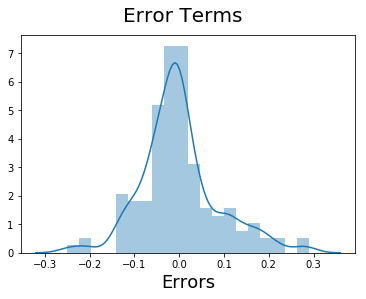

In [44]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

## Making Predictions

In [45]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [46]:
y_test = df_test.pop('price')
X_test = df_test

In [47]:
X_test_new = X_test[X.columns]
X_test_new = sm.add_constant(X_test_new)

In [48]:
y_pred = lm2.predict(X_test_new)

Text(0, 0.5, 'y_pred')

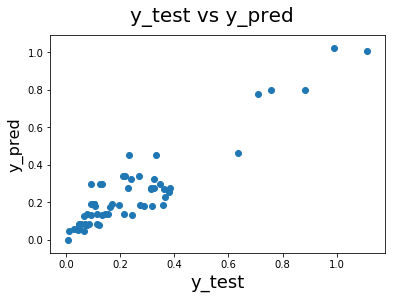

In [49]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

## Final features : 
    1) enginesize
    2) enginelocation
    3) bmw - (carcompany)
    4) two - (cylindertype)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.8549789649521332